In [44]:
import json
import numpy as np
import math
import json
import matplotlib.pyplot as plt
from scipy import interpolate 
import pylab as pl 
import matplotlib as mpl 

In [45]:
#StructureFactorX.real
#stuXr
L = 7
iter = 1000
stuXr_1 = []
g = 0.01

for kx in np.arange(0, 101, 5):
    for ky in np.arange(0, 101, 5):
        #print("%d %d"%(kx, ky))
        stuXr_each_kx_ky = []
        data = json.load(open("log_data_%d*%d_structure_factor_x_g_%0.2f/<text%0.2f_iter_%d_%d*%d_kx_%d_ky_%d>.log"%(L, L, g, g, iter, L, L, kx, ky),))
        for iteration in data["StructureFactorX"]["Mean"]["real"]:
            stuXr_each_kx_ky.append(iteration)
        stuXr_each_kx_ky_mean = abs(np.mean(stuXr_each_kx_ky[-20:]))
        stuXr_1.append(stuXr_each_kx_ky_mean)
                               

In [46]:
stuXr_2 = []
g2 = 1

for kx in np.arange(0, 101, 5):
    for ky in np.arange(0, 101, 5):
        #print("%d %d"%(kx, ky))
        stuXr_each_kx_ky = []
        data = json.load(open("log_data_%d*%d_structure_factor_x_g_%0.2f/<text%0.2f_iter_%d_%d*%d_kx_%d_ky_%d>.log"%(L, L, g2, g2, iter, L, L, kx, ky),))
        for iteration in data["StructureFactorX"]["Mean"]["real"]:
            stuXr_each_kx_ky.append(iteration)
        stuXr_each_kx_ky_mean = abs(np.mean(stuXr_each_kx_ky[-20:]))
        stuXr_2.append(stuXr_each_kx_ky_mean)

In [47]:
G1 = np.reshape(stuXr_1, (-1, 21))
G2 = np.reshape(stuXr_2, (-1, 21))

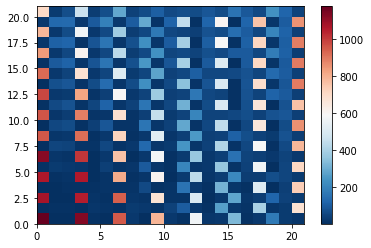

In [56]:


fig, axs = plt.subplots(1, 1)
#cmaps = 'viridis'
cmaps = 'RdBu_r'
for col in range(1):
    for row in range(1):
        ax = axs
        pcm = ax.pcolormesh(G1,
                            cmap=cmaps)
        fig.colorbar(pcm, ax=ax)
plt.show()

In [133]:
y,x= np.mgrid[0:20:21j, 0:20:21j] 
newfunc = interpolate.interp2d(x, y, G1, kind='cubic') 
xnew = np.linspace(0,20,210)#x 
ynew = np.linspace(0,20,210)#y 
fnew = newfunc(xnew, ynew)#仅仅是y值 100*100的值 

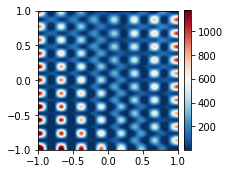

In [134]:
pl.subplot(121) 
im1=pl.imshow(G1, extent=[-1,1,-1,1], cmap='RdBu_r', interpolation='blackman', origin="lower")#pl.cm.jet 
#extent=[-1,1,-1,1]为x,y范围 favals为 
pl.colorbar(im1, fraction=0.046, pad=0.04) 

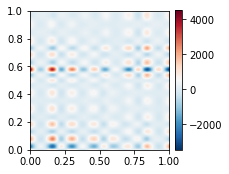

In [135]:
pl.subplot(122) 
im2=pl.imshow(fnew, extent=[0,1,0,1], cmap='RdBu_r', interpolation='blackman', origin="lower") 
pl.colorbar(im2, fraction=0.046, pad=0.04) 